In [23]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [24]:
creditData = pd.read_csv('Depression.csv')
creditData.head()

,Family Problem,Ignored,Social Support,Age,Gender,Demographics,CGPA,Financial Problem,Depression
0,No,Sleep quality,High,38,Male,Rural,Moderate,Mild,0
1,No,Sleep quality,High,51,Male,Urban,High,Mild,0
2,Yes,Exercise,Moderate,32,Female,Urban,High,Significant,0
3,No,Exercise,High,64,Female,Rural,Moderate,Moderate,0
4,Yes,Sleep quality,Low,31,Male,Rural,Moderate,Moderate,0


In [25]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Family Problem     100000 non-null  object
 1   Ignored            100000 non-null  object
 2   Social Support     100000 non-null  object
 3   Age                100000 non-null  int64 
 4   Gender             100000 non-null  object
 5   Demographics       100000 non-null  object
 6   CGPA               100000 non-null  object
 7   Financial Problem  100000 non-null  object
 8   Depression         100000 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


Let's list down all our observations from the super-quick glance of the dataset, as above.

There are 9 variables/features/columns and 10000 observations/samples/rows in the dataset.
The response variable seems to be Depression, while the remaining 8 are most likely predictors.
There are 1 variables identified as int64 by default, and it seems it is indeed Numeric.
There are 7 variables identified as object by default, and they are most likely Categorical.
None of the variables/features seem to have any missing value (have to check again, carefully).

C:\Users\14144\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


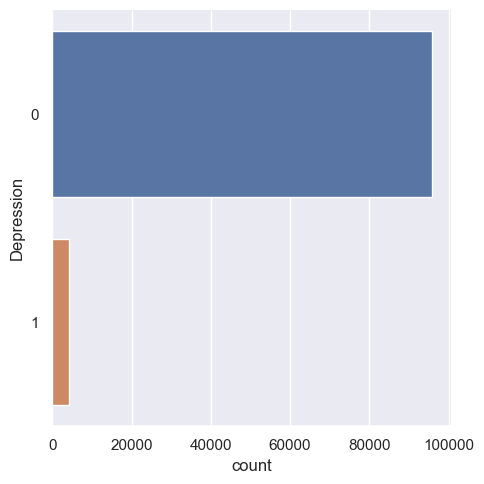

In [26]:
sb.catplot(y = 'Depression', data = creditData, kind = "count")

In [27]:
count0, count1 = creditData['Depression'].value_counts()
print("Ratio of classes is 0 : 1 = ", count0, ":", count1)

Ratio of classes is 0 : 1 =  95715 : 4285


In [28]:
# Numeric Predictors
creditData['Age'].describe()

count    100000.000000
mean         41.454300
std          13.839204
min          18.000000
25%          29.000000
50%          41.000000
75%          53.000000
max          65.000000
Name: Age, dtype: float64

In [29]:
# Categorical Predictors
creditData[['Family Problem','Ignored','Social Support','Gender','Demographics','CGPA','Financial Problem']].describe()

,Family Problem,Ignored,Social Support,Gender,Demographics,CGPA,Financial Problem
count,100000,100000,100000,100000,100000,100000,100000
unique,2,3,3,2,2,3,3
top,Yes,Exercise,High,Male,Rural,Low,Mild
freq,50042,33597,33453,50052,50087,33409,33452


<Axes: xlabel='Age', ylabel='Count'>

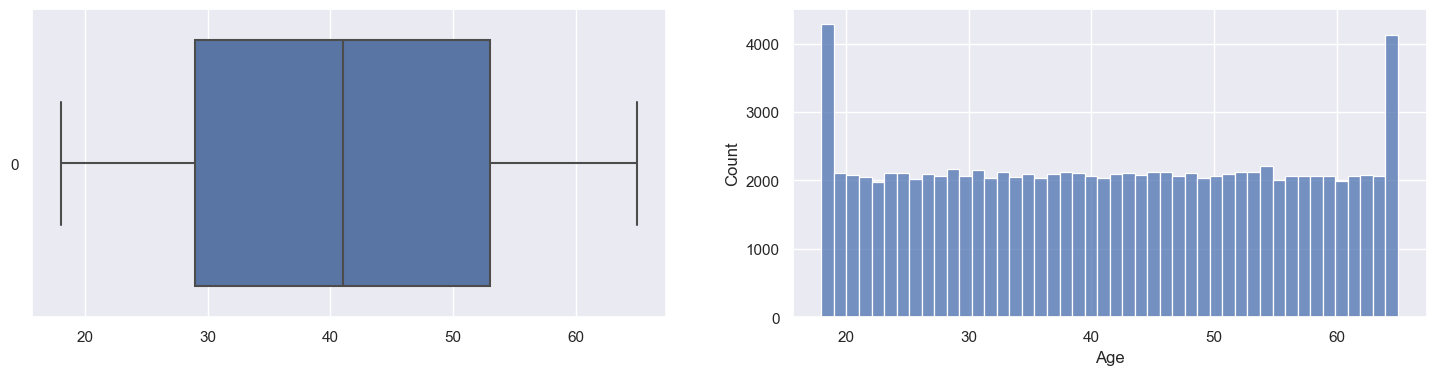

In [30]:
# Age 
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = creditData['Age'], orient = "h", ax = axes[0])
sb.histplot(data = creditData['Age'], ax = axes[1])

C:\Users\14144\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


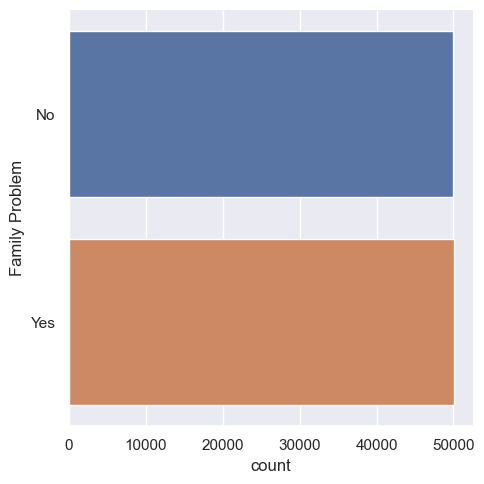

In [31]:
# Family Problem
sb.catplot(y = 'Family Problem', data = creditData, kind = "count")

C:\Users\14144\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


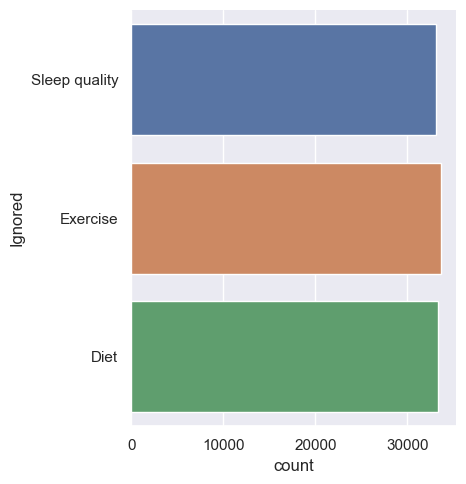

In [32]:
# Ignored
sb.catplot(y = 'Ignored', data = creditData, kind = "count")

C:\Users\14144\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


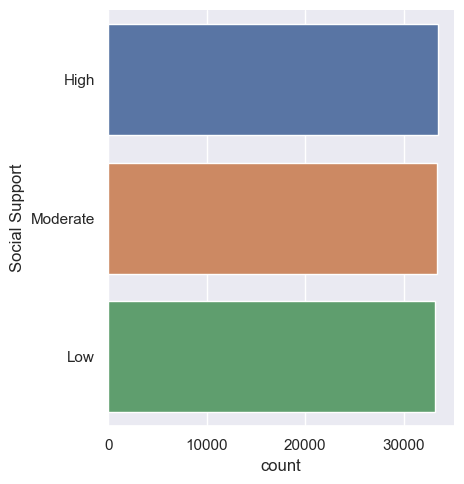

In [33]:
#Social Support
sb.catplot(y = 'Social Support', data = creditData, kind = "count")

C:\Users\14144\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


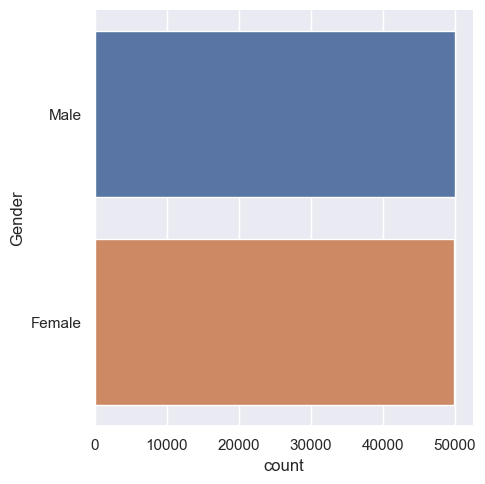

In [34]:
#Gender
sb.catplot(y = 'Gender', data = creditData, kind = "count")

C:\Users\14144\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


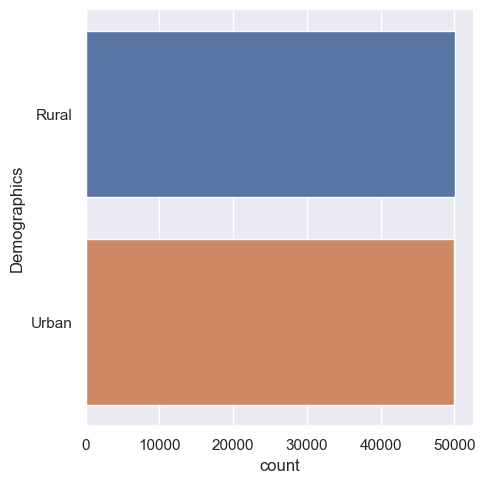

In [35]:
#Demographics
sb.catplot(y = 'Demographics', data = creditData, kind = "count")

C:\Users\14144\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


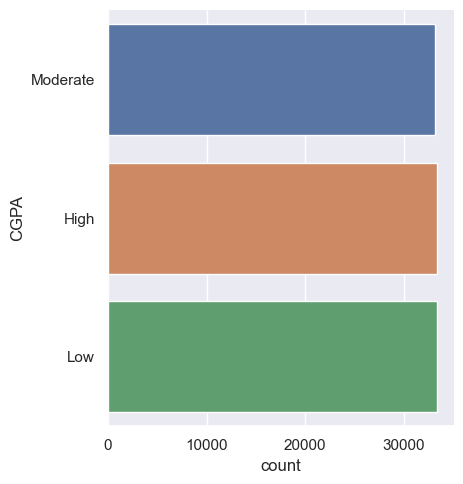

In [36]:
#CGPA
sb.catplot(y = 'CGPA', data = creditData, kind = "count")

C:\Users\14144\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


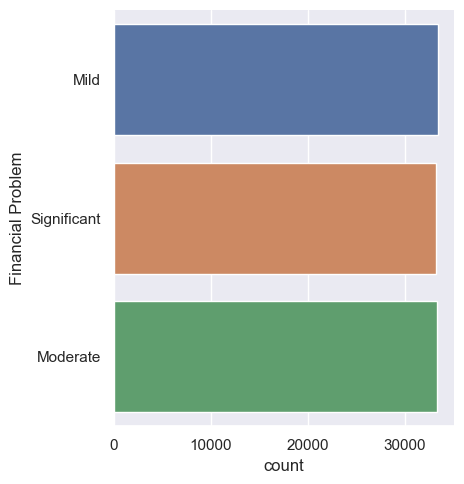

In [37]:
#Financial Problem
sb.catplot(y = 'Financial Problem', data = creditData, kind = "count")

<Axes: xlabel='Financial Problem', ylabel='Depression'>

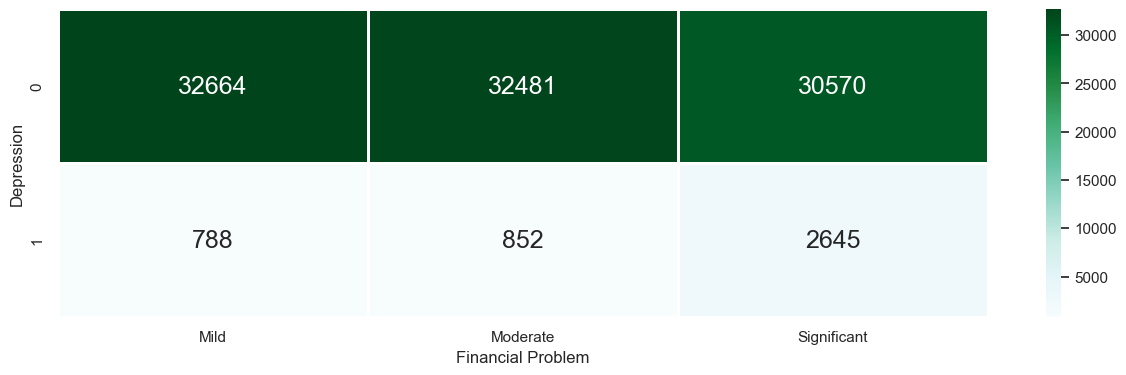

In [38]:
# Rating vs Employment Status
f = plt.figure(figsize=(15, 4))
sb.heatmap(creditData.groupby(['Depression', 'Financial Problem']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='Age', ylabel='Depression'>

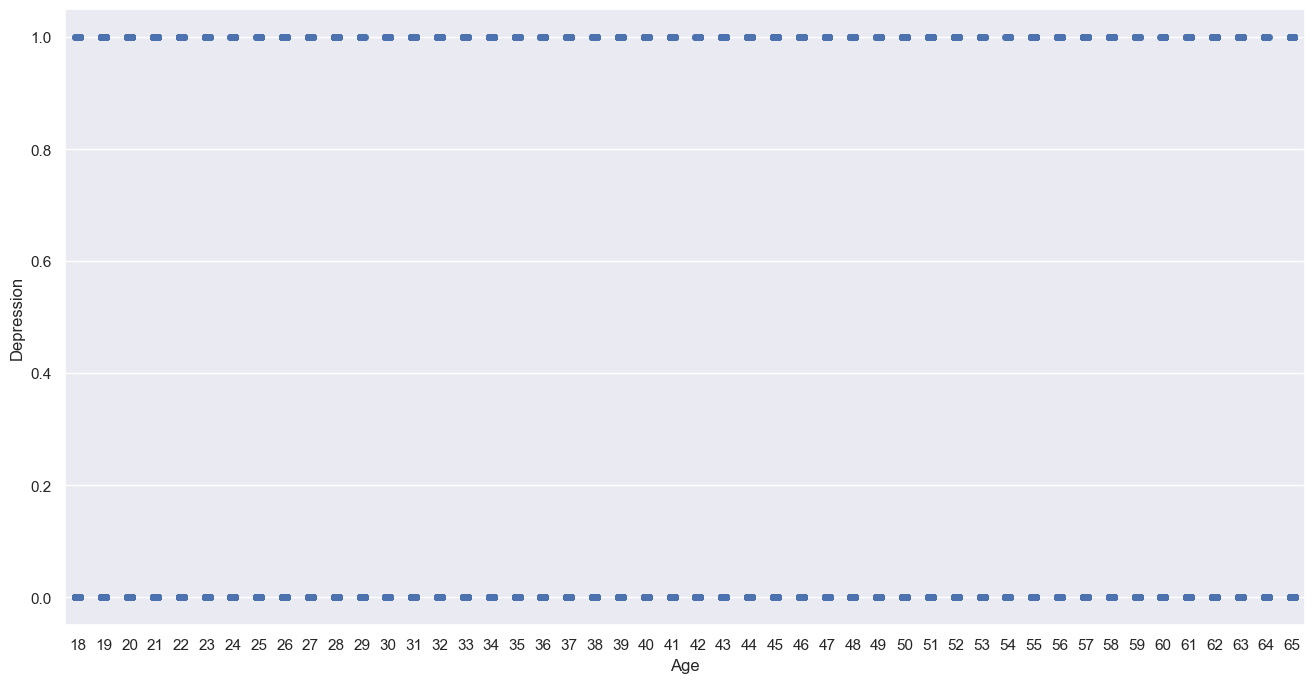

In [51]:
# Rating vs Amount
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Age', y = 'Depression', data = creditData)

<Axes: xlabel='Gender', ylabel='Depression'>

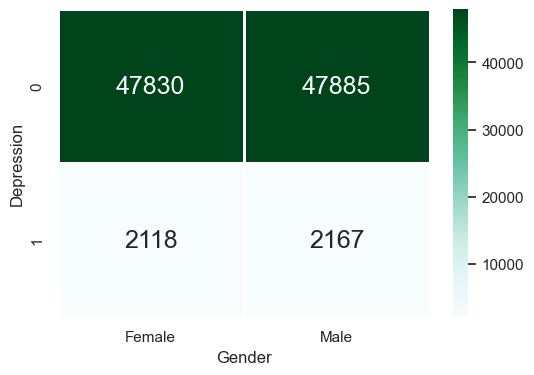

In [41]:
# Rating vs Gender
f = plt.figure(figsize=(6, 4))
sb.heatmap(creditData.groupby(['Depression', 'Gender']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='Family Problem', ylabel='Depression'>

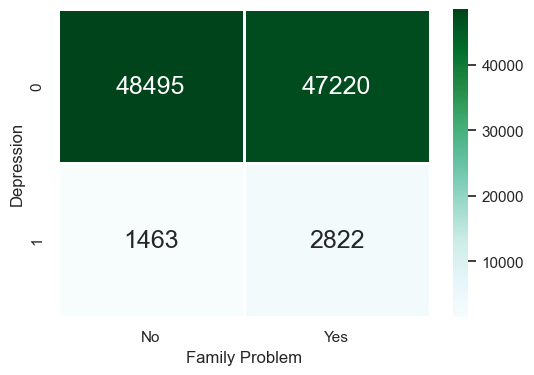

In [42]:
# Rating vs Gender
f = plt.figure(figsize=(6, 4))
sb.heatmap(creditData.groupby(['Depression', 'Family Problem']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='Ignored', ylabel='Depression'>

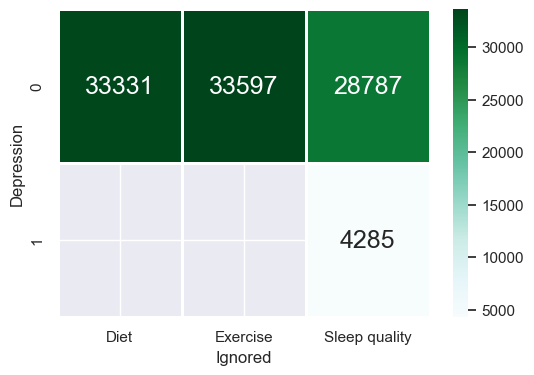

In [44]:
# Rating vs Gender
f = plt.figure(figsize=(6, 4))
sb.heatmap(creditData.groupby(['Depression', 'Ignored']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='Social Support', ylabel='Depression'>

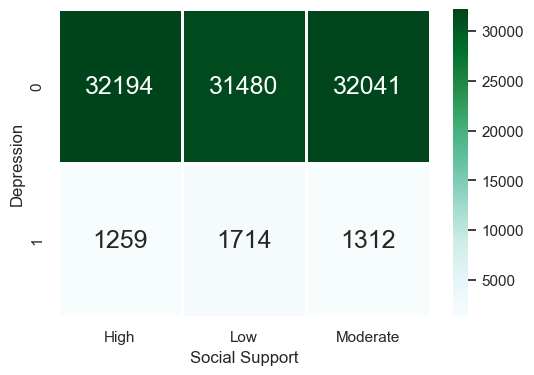

In [45]:
# Rating vs Gender
f = plt.figure(figsize=(6, 4))
sb.heatmap(creditData.groupby(['Depression', 'Social Support']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='Demographics', ylabel='Depression'>

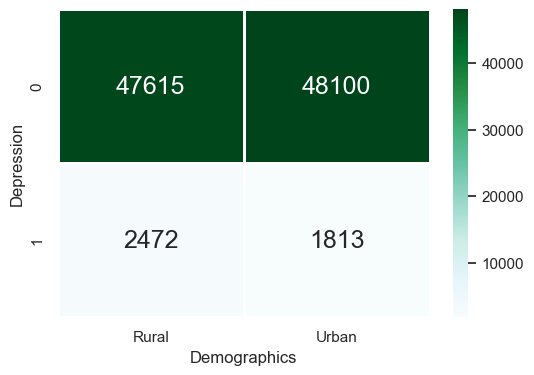

In [46]:
# Rating vs Gender
f = plt.figure(figsize=(6, 4))
sb.heatmap(creditData.groupby(['Depression', 'Demographics']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='CGPA', ylabel='Depression'>

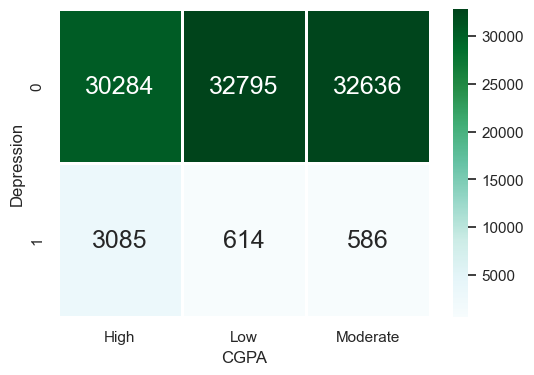

In [47]:
# Rating vs Gender
f = plt.figure(figsize=(6, 4))
sb.heatmap(creditData.groupby(['Depression', 'CGPA']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='Financial Problem', ylabel='Depression'>

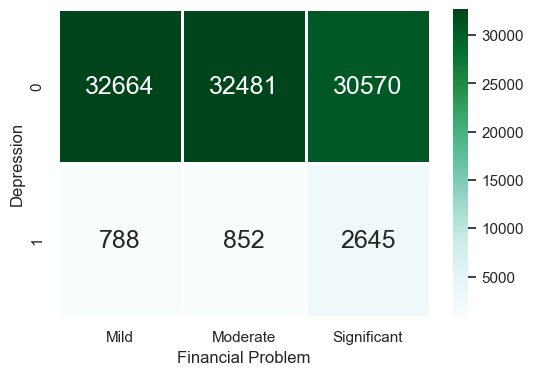

In [48]:
# Rating vs Gender
f = plt.figure(figsize=(6, 4))
sb.heatmap(creditData.groupby(['Depression', 'Financial Problem']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

C:\Users\14144\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


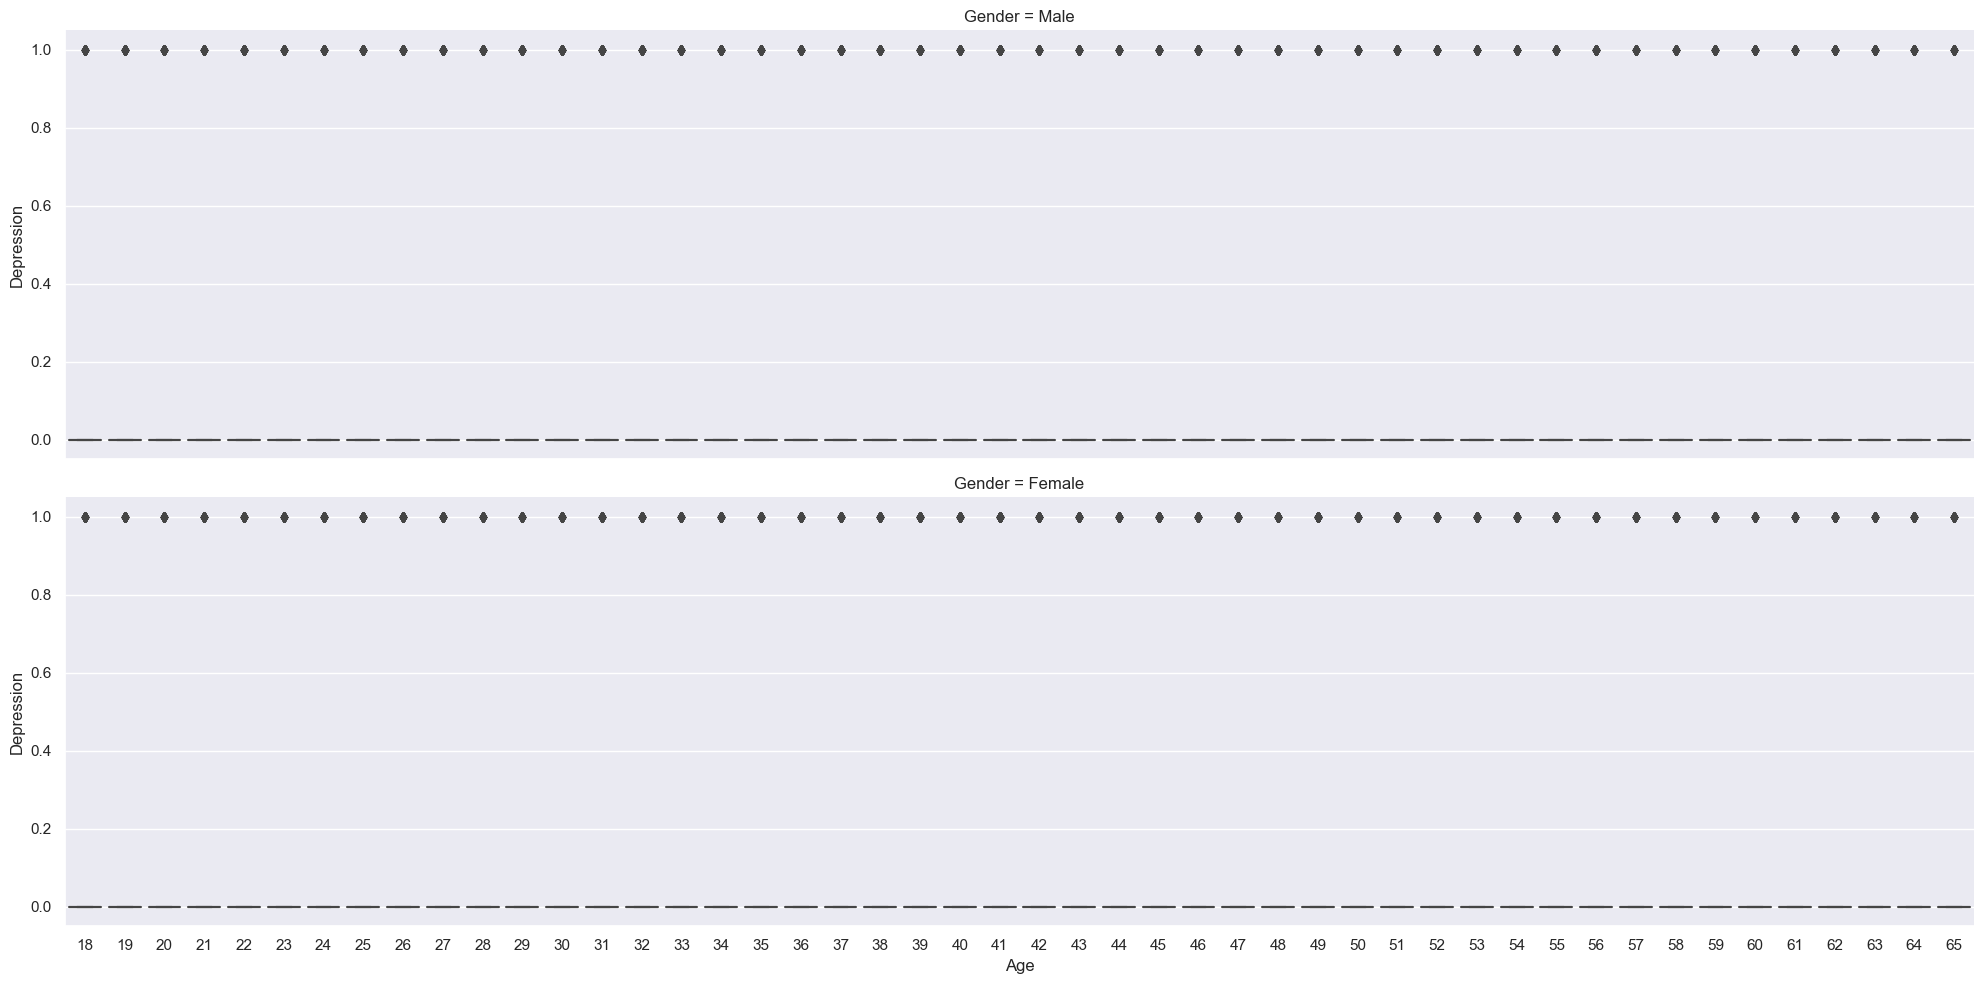

In [49]:
# Rating vs Age and Gender
sb.catplot(x = 'Age', y = 'Depression', row = 'Gender', data = creditData, kind = 'box', aspect = 4)